# </font> <font color = #4854E8> K-NEAREST NEIGHBOUR </font>

KNN is a simple algorithm that stores all available cases and classifies new cases based on a similarity measure (eg distance function).
![Distance Formula](https://miro.medium.com/max/626/1*whWqafWqGnpM-_3SDEypPA.png)

##  Information of Dataset
<b>The Banknote Authentication Dataset:</b> There are 1372 items (images of banknotes — think Euro or dollar bill). There are 4 predictor variables (variance of image, skewness, kurtosis, entropy). The variable to predict is encoded as 0 (authentic) or 1 (forgery). https://archive.ics.uci.edu/ml/datasets/banknote+authentication

<b> Importing the libraries </b>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_absolute_error, roc_auc_score

<b> Importing the Dataset </b>

In [2]:
col_names = ['Variance of Image', 'Skewness', 'Kurtosis', 'Entropy', 'Class']
df = pd.read_table('data_banknote_authentication.txt', sep = ',', header = None, names = col_names)
df.tail(7)

,Variance of Image,Skewness,Kurtosis,Entropy,Class
1365,-4.50460,-5.81260,10.88670,-0.52846,1
1366,-2.41000,3.74330,-0.40215,-1.29530,1
1367,0.40614,1.34920,-1.45010,-0.55949,1
1368,-1.38870,-4.87730,6.47740,0.34179,1
1369,-3.75030,-13.45860,17.59320,-2.77710,1
1370,-3.56370,-8.38270,12.39300,-1.28230,1
1371,-2.54190,-0.65804,2.68420,1.19520,1


<b> Data Summery and Visulaization </b>

In [3]:
#Data shape
print('The number of columns :',df.shape[0])
print('The number of rows    :',df.shape[1])

The number of columns : 1372
The number of rows    : 5


In [4]:
#Data Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Variance of Image  1369 non-null   float64
 1   Skewness           1371 non-null   float64
 2   Kurtosis           1370 non-null   float64
 3   Entropy            1372 non-null   float64
 4   Class              1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [5]:
#Data describe
df.describe()

,Variance of Image,Skewness,Kurtosis,Entropy,Class
count,1369.000000,1371.000000,1370.000000,1372.000000,1372.000000
mean,0.429191,1.927314,1.396384,-1.191657,0.444606
std,2.843262,5.868310,4.312311,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.778100,-1.697850,-1.610525,-2.413450,0.000000
50%,0.495710,2.325900,0.616630,-0.586650,0.000000
75%,2.808400,6.815150,3.174525,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


<b> Visualize the class </b>

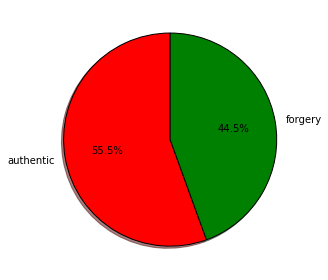

In [6]:
authentic = df[df['Class'] == 0].shape[0]
forgery = df[df['Class'] == 1].shape[0]

label = [authentic, forgery]
plt.pie(label, labels = ['authentic', 'forgery'], shadow = True, wedgeprops = {'edgecolor': 'black'},
       autopct = '%1.1f%%', startangle = 90, colors = ['red', 'green'])
plt.tight_layout()
plt.show()

<b> Checking the realtionship between the features </b>

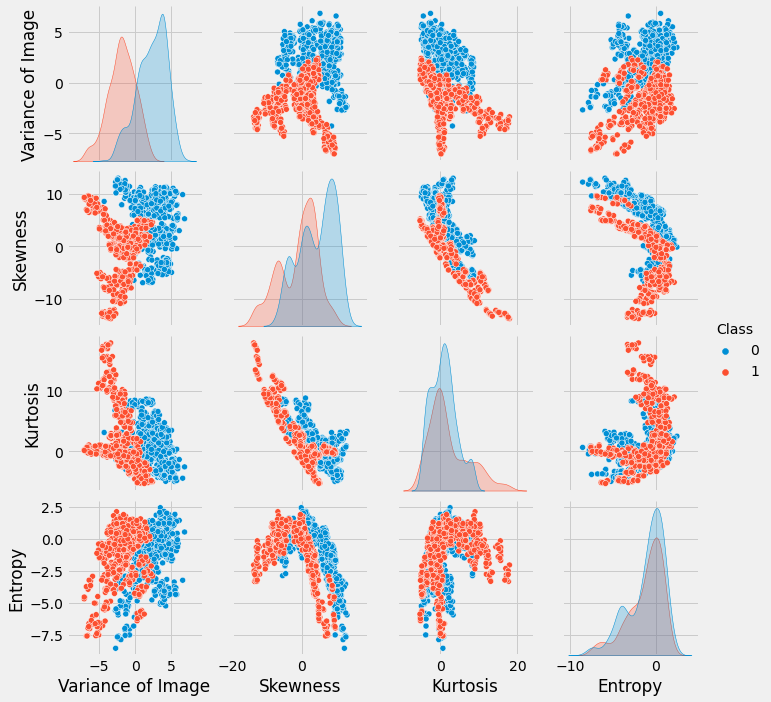

In [7]:
plt.style.use('fivethirtyeight')
sns.pairplot(df, hue = 'Class')

<b> Check the correlation between the features </b>

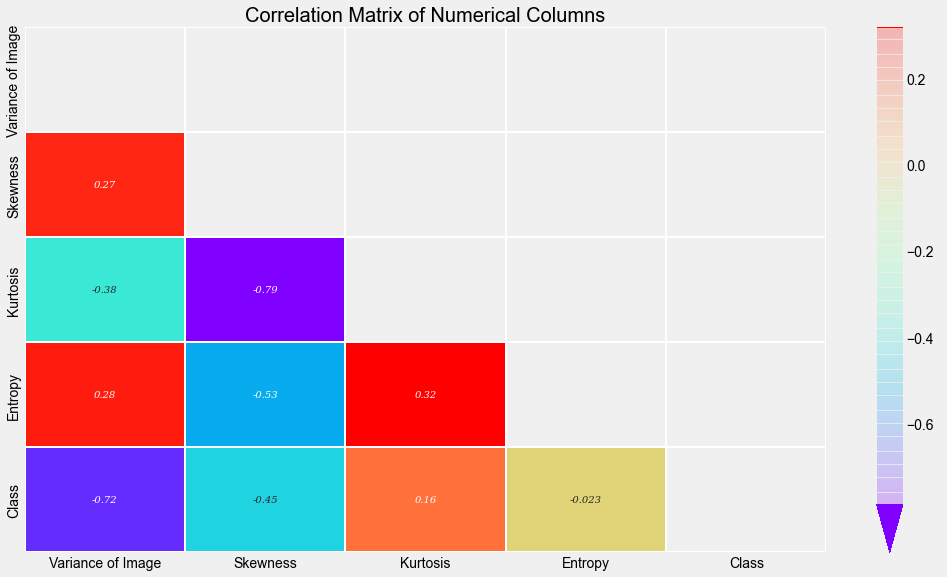

In [8]:
# Define the figure size
plt.figure(figsize = (16, 9))

# Cutomize the annot
annot_kws={'fontsize':10,                      # To change the size of the font
           'fontstyle':'italic',               # To change the style of font 
           'fontfamily': 'serif',              # To change the family of font 
           'alpha':1 }                         # To change the transparency of the text  


# Customize the cbar
cbar_kws = {"shrink":1,                        # To change the size of the color bar
            'extend':'min',                    # To change the end of the color bar like pointed
            'extendfrac':0.1,                  # To adjust the extension of the color bar
            "drawedges":True,                  # To draw lines (edges) on the color bar
           }

# take upper correlation matrix
matrix = np.triu(df.corr())

# Generate heatmap correlation
ax = sns.heatmap(df.corr(), mask = matrix, cmap = 'rainbow', annot = True, linewidth = 1.5 ,annot_kws= annot_kws, cbar_kws=cbar_kws)

# Set the title etc
plt.title('Correlation Matrix of Numerical Columns', fontsize = 20)

# Set the size of text
sns.set(font_scale = 1.2)

<b> Data Preprocessing </b>

<b> Defining the Predictor and Target Attribute </b>

In [9]:
X = df.iloc[:, :-1].to_numpy()
Y = df.iloc[:, -1].to_numpy()
print('predictor attribute', X)
print('target attribute', Y)

predictor attribute [[  3.6216    8.6661   -2.8073   -0.44699]
 [  4.5459    8.1674   -2.4586   -1.4621 ]
 [  3.866    -2.6383    1.9242    0.10645]
 ...
 [ -3.7503  -13.4586   17.5932   -2.7771 ]
 [ -3.5637   -8.3827   12.393    -1.2823 ]
 [ -2.5419   -0.65804   2.6842    1.1952 ]]
target attribute [0 0 0 ... 1 1 1]


<b> Checking the missing values </b>

In [10]:
df.isna().sum()

Variance of Image    3
Skewness             1
Kurtosis             2
Entropy              0
Class                0
dtype: int64

<b> Apply mean strategy to handle missing values </b>

In [11]:
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')       
imputer  = imputer.fit(X)
X = imputer.transform(X)
X

array([[  3.6216 ,   8.6661 ,  -2.8073 ,  -0.44699],
       [  4.5459 ,   8.1674 ,  -2.4586 ,  -1.4621 ],
       [  3.866  ,  -2.6383 ,   1.9242 ,   0.10645],
       ...,
       [ -3.7503 , -13.4586 ,  17.5932 ,  -2.7771 ],
       [ -3.5637 ,  -8.3827 ,  12.393  ,  -1.2823 ],
       [ -2.5419 ,  -0.65804,   2.6842 ,   1.1952 ]])

<b> Feature Scaling </b>

In [12]:
sc_X = StandardScaler()
X = sc_X.fit_transform(X)
X

array([[ 1.12443818,  1.14917295, -0.97587762,  0.35456135],
       [ 1.4499974 ,  1.06412906, -0.89492756, -0.12876744],
       [ 1.21052135, -0.7785795 ,  0.12253144,  0.61807317],
       ...,
       [-1.47211061, -2.62377781,  3.76006109, -0.75488418],
       [-1.4063859 , -1.7581787 ,  2.55284418, -0.04315848],
       [-1.04648498, -0.44088347,  0.29896404,  1.1364645 ]])

<b> Split data into train and test </b>

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [14]:
#Training Data
print("X_train", X_train.shape)
print("Y_train", y_train.shape)

X_train (1097, 4)
Y_train (1097,)


In [15]:
#Testing Data
print("X_test", X_test.shape)
print("X_test", y_test.shape)

X_test (275, 4)
X_test (275,)


# Build k-Nearest Neighbour

In this part, we build k-Nearest Neighbour Model with sklearn.

<b> Import model from sklearn and initilize the model </b>

In [16]:
from sklearn.neighbors import KNeighborsClassifier

<b> Plotting the error curves to find optimal k value </b>

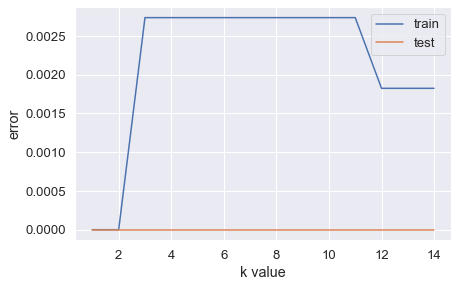

In [17]:
error1 = []
error2 = []
for k in range(1,15):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train,y_train)
    
    y_pred1 = knn.predict(X_train)
    error1.append(np.mean(y_train != y_pred1))
    
    y_pred2 = knn.predict(X_test)
    error2.append(np.mean(y_test != y_pred2))
    
plt.plot(range(1,15), error1, label='train')
plt.plot(range(1,15), error2, label='test')
plt.xlabel('k value')
plt.ylabel('error')
plt.legend()

We can observe the value of X_train takes turn at k=5 , so k =5 is the optimal value

<b> Initilize the model </b>

In [18]:
knn_Sklearn = KNeighborsClassifier(n_neighbors= 5, metric= 'minkowski', p= 2)

<b> Fitting the training data into the model </b>

In [19]:
knn_Sklearn.fit(X_train, y_train)

KNeighborsClassifier()

<b> Predict the test data </b>

In [20]:
y_pred = knn_Sklearn.predict(X_test)
y_pred

array([1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1], dtype=int64)

# Evaluate the Result

In this part, we evaluate the --Nearest Neighbour classifer. first we make confusion matrix and we visualize the score following ("Accuracy", "Precision", "TPR", "FPR", "F-Score", "Specificity", "Error" and "Roc Area").

<b> Confusion matrix </b>

<AxesSubplot:>

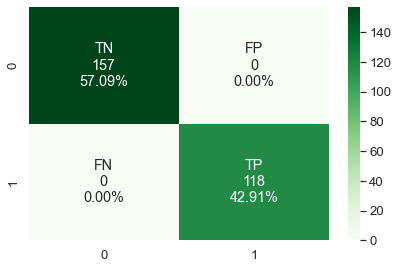

In [21]:
confusion_matrix_Scratch = confusion_matrix(y_pred, y_test)

#[row, column]
TP = confusion_matrix_Scratch[1, 1]        
TN = confusion_matrix_Scratch[0, 0]           
FP = confusion_matrix_Scratch[0, 1]           
FN = confusion_matrix_Scratch[1, 0]

group_names = ['TN','FP','FN','TP']

group_counts = ["{0:0.0f}".format(value) for value in confusion_matrix_Scratch.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in confusion_matrix_Scratch.flatten()/np.sum(confusion_matrix_Scratch)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

sns.heatmap(confusion_matrix_Scratch, annot=labels, fmt='', cmap='Greens')

<b> Calculate the results </b>

In [22]:
# Accuracy Score
Accuracy = accuracy_score(y_pred, y_test)
print('Accuracy Score:', Accuracy) 

# Precision Score
Precision = precision_score(y_pred, y_test)
print('Precision Score:', Precision)   

# True positive Rate (TPR) or Sensitivity or Recall
TPR = recall_score(y_pred, y_test)
print('True positive Rate:', TPR)             

# False positive Rate (FPR)
FPR = FP / float(TN + FP)
print('False positive Rate', FPR)                       

# F1 Score or F-Measure or F-Score
F1 = f1_score(y_pred, y_test)
print('F1 Score:', F1)                 

# Specificity
Specificity = TN / (TN + FP)
print('Specificity:', Specificity )                    

# Mean Absolute Error
Error = mean_absolute_error(y_pred, y_test)
print('Mean Absolute Error:', Error)   

# ROC Area
Roc = roc_auc_score(y_pred, y_test)
print('ROC Area:', Roc)

Accuracy Score: 1.0
Precision Score: 1.0
True positive Rate: 1.0
False positive Rate 0.0
F1 Score: 1.0
Specificity: 1.0
Mean Absolute Error: 0.0
ROC Area: 1.0
